In [171]:
# Required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [173]:
# Reading the  students study hours datasets.
studyHour = pd.read_csv(r"C:\Users\Amar Kiran\Desktop\Amar data sciene\amar data science\student_info.csv")
studyHour.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


the datasets contains 2 columns:
    1: studt hours
    2: Marks
both are continues we can apply the simple linera regression technique

In [176]:
# summary statistics
studyHour.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [178]:
# The mean study is 7 hour and the mean marks is 78%
mean_hour = studyHour['study_hours'].mean()
mean_marks = studyHour['student_marks'].mean()
print(f'The students are studying on average {round(mean_hour)} hours everyday, and average {round(mean_marks)}% of marks obtained')

The students are studying on average 7 hours everyday, and average 78% of marks obtained


In [180]:
#checking for missing value in dataset

In [182]:
print(f' There are \n{studyHour.isnull().sum()} missing observation')

 There are 
study_hours      5
student_marks    0
dtype: int64 missing observation


In [184]:
# fill na values in study hours column
studyHour['study_hours'] = studyHour['study_hours'].fillna(mean_hour)

In [186]:
studyHour.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [188]:
# choose X and X inputs
X = pd.DataFrame(studyHour['study_hours'])
y = studyHour['student_marks']

In [190]:
X.shape, y.shape

((200, 1), (200,))

In [192]:
#scatter plot for linear relation between studt_hours vs student_marks

Text(0, 0.5, 'students study marks')

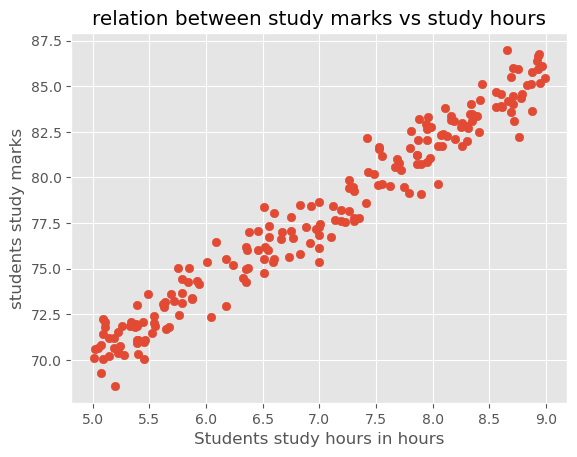

In [194]:
plt.scatter(X,y)
plt.title("relation between study marks vs study hours")
plt.xlabel('Students study hours in hours')
plt.ylabel("students study marks")

In [196]:
# checking the linear relation between study hours and marks
relation = studyHour['student_marks'].corr(studyHour['study_hours'])
if relation > 0.5:
    print(f'r={round(relation,2)} There is strong relation between study hours and marks obtained')
else:
    print(f'{relation} There lower relation')

r=0.98 There is strong relation between study hours and marks obtained


In [198]:
# Loading and fitting the linear equation model from scikit library

In [200]:
Linear_model = LinearRegression()
Linear_model.fit(X,y)

LinearRegression()

In [202]:
Linear_model.coef_, Linear_model.intercept_

(array([3.89645241]), 50.67436878323756)

In [204]:
# calculate the R2 value on fitted equation
R2 = Linear_model.score(X,y)
print(f'R2 score is {round(R2,2)}')

R2 score is 0.96


In [206]:
#R2 score is higher we go for prediction
#Prediction on user data


In [208]:
studying_hours = np.array(int(input('Enter:  How much hours for daily you study?')),ndmin = 2)

if studying_hours <= 0 or studying_hours > 10 :
    print('Given the hour between 1 to 10')
else:
    scoring_marks = Linear_model.predict(studying_hours)
    print(f'If you study of {studying_hours[0,0]} hours, you will score{round(scoring_marks[0],2)}%')

Enter:  How much hours for daily you study? 4


If you study of 4 hours, you will score66.26%


In [21]:
# loading and fitting the linear equation model from statsmodels library

In [210]:
#fit the linear regression model OLS (ordinary least square method)
import statsmodels.api as sm
X = sm.add_constant(X)
mlr_model = sm.OLS(y, X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.958    
Dependent Variable: student_marks    AIC:                575.0788 
Date:               2024-08-04 11:10 BIC:                581.6754 
No. Observations:   200              Log-Likelihood:     -285.54  
Df Model:           1                F-statistic:        4499.    
Df Residuals:       198              Prob (F-statistic): 4.19e-138
R-squared:          0.958            Scale:              1.0280   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         50.6744    0.4127  122.7931  0.0000  49.8606  51.4882
study_hours    3.8965    0.0581   67.0743  0.0000   3.7819   4.0110
------------------------------------------------------------------
Omnibus:              0.157         Durbin-Watson:           1.905
Prob(Omnibus):        0.924         Jarque-Bera (JB):        0.230
Skew:                 -0.065        Prob(JB):                0.891
Kurtosis:             2.896         Condition No.:           42   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [212]:
#R2 score
R2_scor = mlr_model.rsquared
print(round(R2_scor,2))

0.96


In [ ]:
# predict marks for 8hours studying
studying_hour = np.array(int(input('Enter: How muh hours for daily you study?')))
if studying_hours <= 0 or studying_hours > 10 :
    print('Given the hour between 1 to 10')
else:
    predict = mlr_model.predict([[1,studying_hours]])
    print(f'If you study of {studying_hours} hours, you will score{round(predict[0],2)}%')

In [276]:
!pip install scikit-learn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [277]:
# load mtcars data set
#https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
plt.style.use('ggplot')

In [279]:
# reading a data file
mtcars = pd.read_csv(r"C:\Users\Amar Kiran\Desktop\Amar data sciene\amar data science\mtcars.csv")
print(mtcars.head())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


In [280]:
# check for the data sets
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

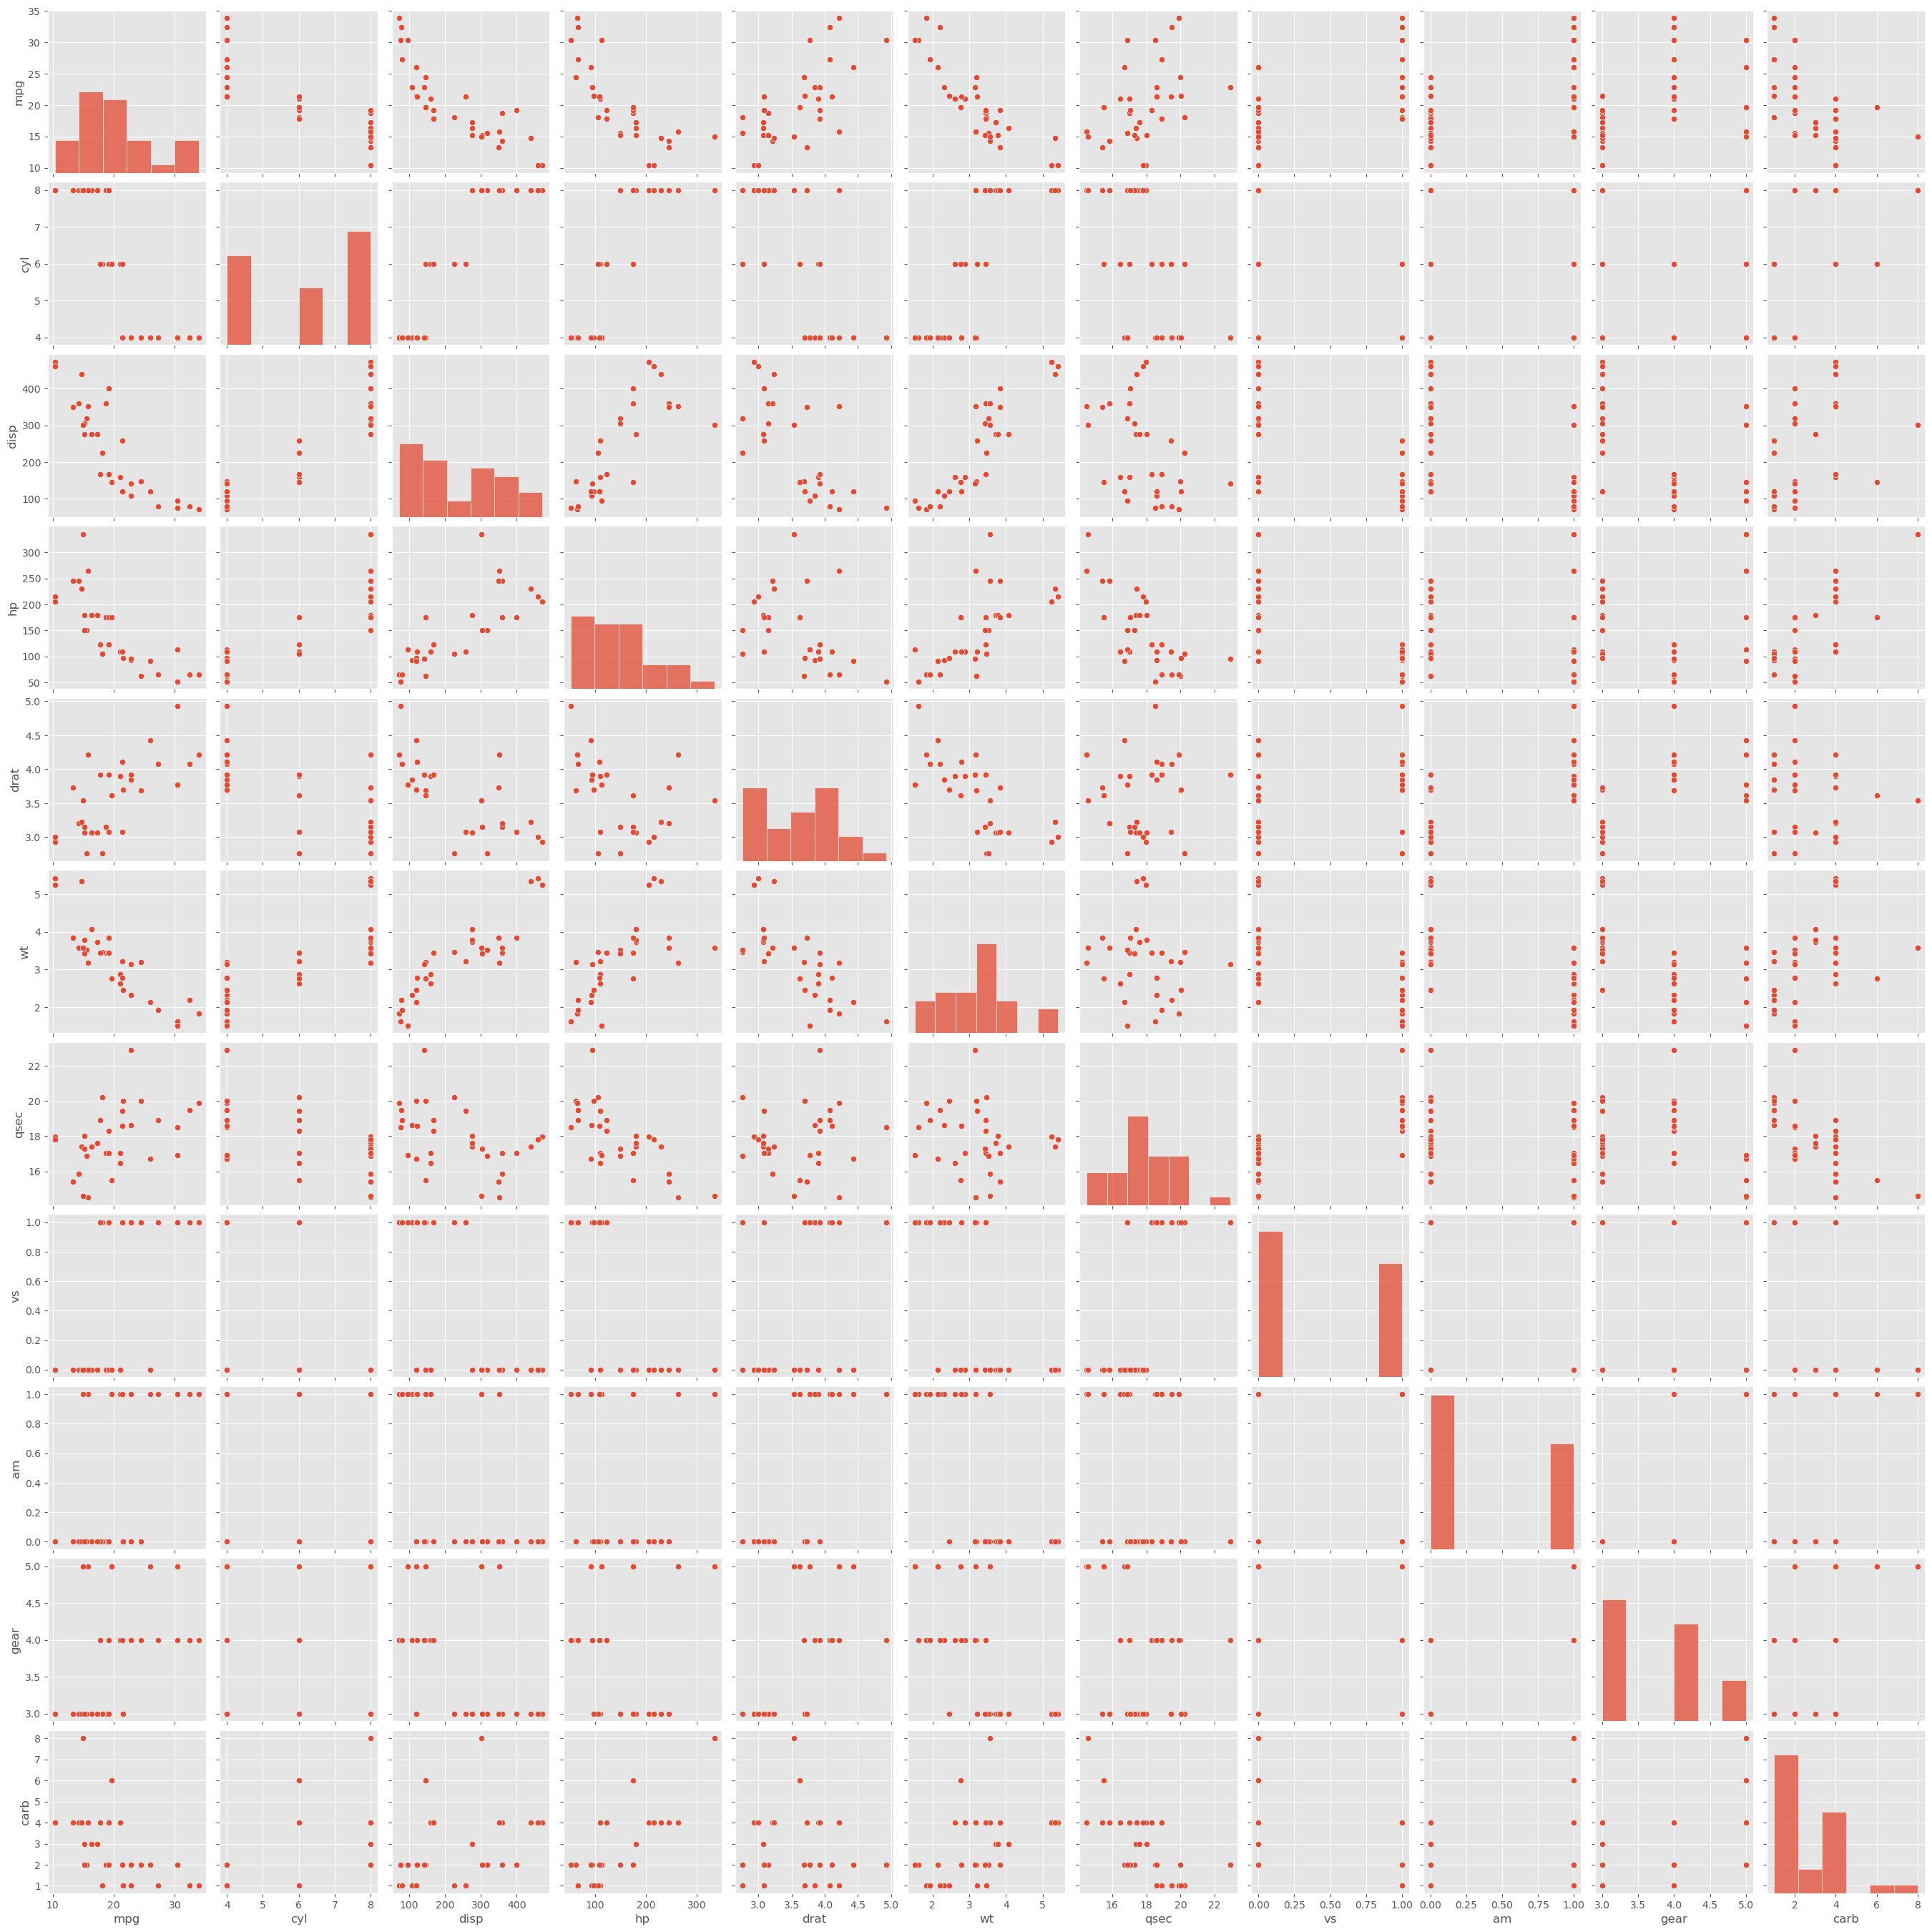

In [281]:
# checking the relation between the pairs for variables
import seaborn as sns
sns.pairplot(mtcars) # matrix plotting

In [282]:
# correlation for mpg vs wt
mtcars['mpg'].corr(mtcars['wt'])

-0.8676593765172281

<Axes: xlabel='wt', ylabel='mpg'>

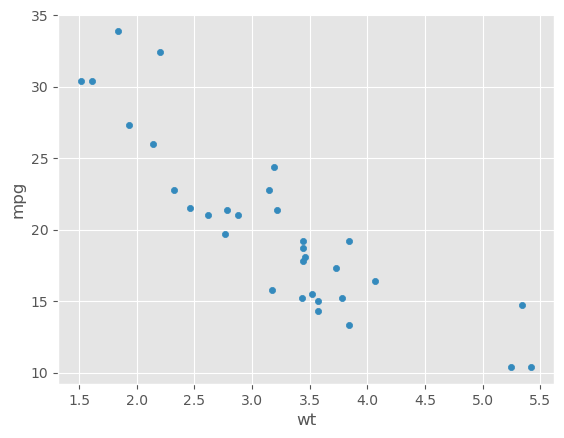

In [283]:
# relation between the weight and mileage
mtcars.plot(kind = 'scatter',x = 'wt',y='mpg')

In [284]:
# summary stats for two variable
mtcars[["mpg","wt"]].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


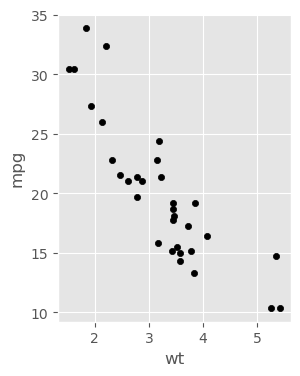

In [285]:
mtcars.plot(kind="scatter",x="wt",y="mpg",figsize = (3,4),color="Black");

In [286]:
#Model Fitting

In [287]:
y = mtcars['mpg']
x = mtcars['wt']
x = sm.add_constant(x) # statsmodel library
print(x)

    const     wt
0     1.0  2.620
1     1.0  2.875
2     1.0  2.320
3     1.0  3.215
4     1.0  3.440
5     1.0  3.460
6     1.0  3.570
7     1.0  3.190
8     1.0  3.150
9     1.0  3.440
10    1.0  3.440
11    1.0  4.070
12    1.0  3.730
13    1.0  3.780
14    1.0  5.250
15    1.0  5.424
16    1.0  5.345
17    1.0  2.200
18    1.0  1.615
19    1.0  1.835
20    1.0  2.465
21    1.0  3.520
22    1.0  3.435
23    1.0  3.840
24    1.0  3.845
25    1.0  1.935
26    1.0  2.140
27    1.0  1.513
28    1.0  3.170
29    1.0  2.770
30    1.0  3.570
31    1.0  2.780


In [288]:
y.shape, x.shape

((32,), (32, 2))

In [289]:
# Linear regression using statsmodel OLS: ordinary least square method
model_sm = sm.OLS(y,x).fit()
print(model_sm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.745   
Dependent Variable: mpg              AIC:                164.0294
Date:               2024-08-04 11:31 BIC:                166.9609
No. Observations:   32               Log-Likelihood:     -80.015 
Df Model:           1                F-statistic:        91.38   
Df Residuals:       30               Prob (F-statistic): 1.29e-10
R-squared:          0.753            Scale:              9.2774  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     37.2851     1.8776   19.8576   0.0000   33.4505   41.1198
wt        -5.3445     0.5591   -9.5590   0.0000   -6.4863   -4.2026
-----------------------------------------------------------------
Omnibus:              2.988        Durbin-Watson:           1.252
Prob(Omnibus):   

In [290]:
model_sm.rsquared

0.7528327936582646

In [291]:
# Fitting a model using Scikit-Learn

In [292]:
from sklearn import linear_model
# initialize model
regression_model = linear_model.LinearRegression()

# train model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),y=y)

#check trained model y-intercept
print(regression_model.intercept_)

# check trained model coefficients
print(regression_model.coef_)

# check for R^2 value.
regression_model.score(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

# #75.28% of variation is understood by Linear regression model.
#r^2 is coefficient of determination, 75% of varition is understood by our model

37.28512616734204
[-5.34447157]


0.7528327936582646

In [293]:
pred = regression_model.predict(X = [[3.5],[4],[5],[6]])
print(pred)

[18.57947566 15.90723988 10.5627683   5.21829673]


In [294]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
print(train_prediction)                                             

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [295]:
mtcars_WM = mtcars[['wt','mpg']]
mtcars_WM['Predicted MPG'] =pd.DataFrame(train_prediction)

In [296]:
mtcars_WM

,wt,mpg,Predicted MPG
0,2.620,21.0,23.282611
1,2.875,21.0,21.919770
2,2.320,22.8,24.885952
3,3.215,21.4,20.102650
4,3.440,18.7,18.900144
5,3.460,18.1,18.793255
6,3.570,14.3,18.205363
7,3.190,24.4,20.236262
8,3.150,22.8,20.450041
9,3.440,19.2,18.900144


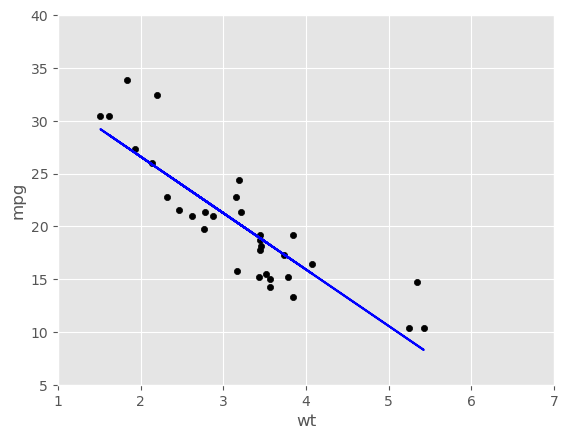

In [297]:
# plot the new model 
mtcars.plot(kind ="scatter", x= "wt", y="mpg", color= "black", xlim=(1,7), ylim=(5,40))
#plot regression line
plt.plot(mtcars["wt"], train_prediction,color="blue");

In [298]:
error_sm = model_sm.resid
error_sm
print(round(sum(error_sm**2),2))

278.32


In [299]:
residuals = y - train_prediction
data = pd.DataFrame({'actual_y' :y,
                     '%predicted_y' : train_prediction,
                     'error1' : error_sm,
                     'error2' : residuals})
print(data)

    actual_y  %predicted_y    error1    error2
0       21.0     23.282611 -2.282611 -2.282611
1       21.0     21.919770 -0.919770 -0.919770
2       22.8     24.885952 -2.085952 -2.085952
3       21.4     20.102650  1.297350  1.297350
4       18.7     18.900144 -0.200144 -0.200144
5       18.1     18.793255 -0.693255 -0.693255
6       14.3     18.205363 -3.905363 -3.905363
7       24.4     20.236262  4.163738  4.163738
8       22.8     20.450041  2.349959  2.349959
9       19.2     18.900144  0.299856  0.299856
10      17.8     18.900144 -1.100144 -1.100144
11      16.4     15.533127  0.866873  0.866873
12      17.3     17.350247 -0.050247 -0.050247
13      15.2     17.083024 -1.883024 -1.883024
14      10.4      9.226650  1.173350  1.173350
15      10.4      8.296712  2.103288  2.103288
16      14.7      8.718926  5.981074  5.981074
17      32.4     25.527289  6.872711  6.872711
18      30.4     28.653805  1.746195  1.746195
19      33.9     27.478021  6.421979  6.421979
20      21.5 

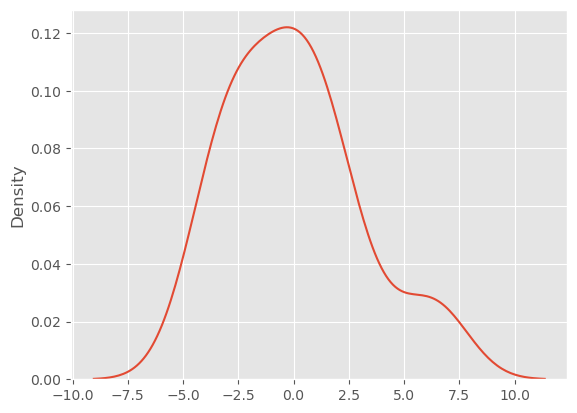

In [300]:
# residual distrubution chart
sns.kdeplot(error_sm)
plt.show()

In [301]:
# polynomial regression Analysis

In [302]:
# initialize model
import warnings
warnings.filterwarnings('ignore')

poly_model = linear_model.LinearRegression()
# make a DataFrame of the predictor variable
predictors_X = pd.DataFrame([mtcars["wt"],
                             mtcars["wt"]**2,
                              mtcars["wt"]**3,
                              mtcars["wt"]**4,
                              mtcars["wt"]**5,
                              mtcars["wt"]**6,
                             ]).T      # include weight squared, ,.T --> Transpose (columnwise yo rowise)
# Train the model using the new_cars data
poly_model.fit(X = predictors_X, y = y)

#check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)
# check trained  model co-efficient (scaling factor given to " wt")
print("Model Coefficient: ",poly_model.coef_)
#check r-squared 
print("Model Accuracy: ", poly_model.score(X = predictors_X, y = mtcars["mpg"]))

Model intercept:  -580.1180291199187
Model Coefficient:  [ 1.25251793e+03 -1.01544961e+03  4.19153811e+02 -9.38894251e+01
  1.08661013e+01 -5.09042883e-01]
Model Accuracy:  0.832248246559977


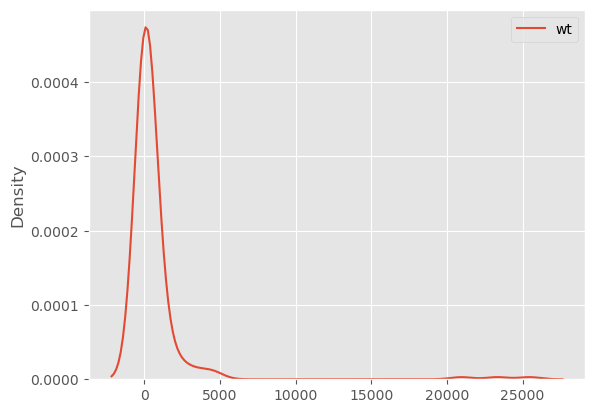

In [303]:
sns.kdeplot(predictors_X)
plt.show()

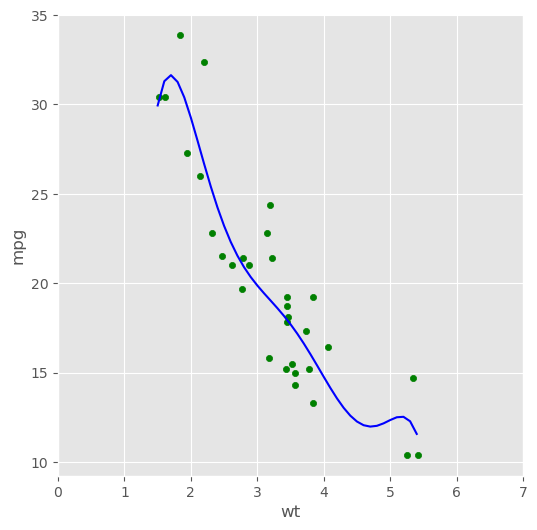

In [304]:
# plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5,5.5,0.1)
# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                                poly_line_range**2,
                                poly_line_range**3,
                                poly_line_range**4,
                                poly_line_range**5,
                                poly_line_range**6,
                               ]).T
# print (poly_predictors)
# get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind = "scatter", x="wt",y="mpg",figsize=(6,6),color="Green",xlim = (0,7))

#polot curve line
plt.plot(poly_line_range,   # X -axis range
         y_values,
         color="blue");

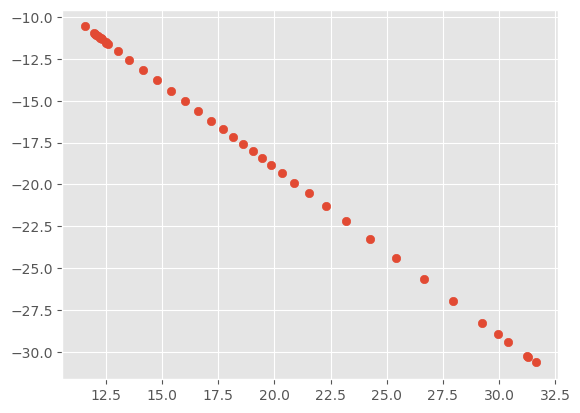

In [305]:
import seaborn as sns
residuals_poly = 1 - y_values
plt.scatter(y = residuals_poly,x = y_values)
plt.show()

In [306]:
# LINEAR REGRESSION: R2 = 0.75283, ADJUSTED_R = 0.7497040984338123
#POLYNOMIAL d = 3: r2 =0.82, adj_r2 = 0.79

In [307]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [308]:
#FITTING MLR MODEL

In [309]:
mtcars =pd.read_csv(r"C:\Users\Amar Kiran\Desktop\Amar data sciene\amar data science\mtcars.csv")
print(mtcars.columns)
# Drop the target variable
X_features = mtcars.drop(['mpg'], axis=1)
X_features.head()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [310]:
X_features.shape

(32, 10)

In [311]:
X_features.dtypes

cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [312]:
# Add concstant intercept  term 1 to dataset
X = sm.add_constant(X_features)
print(X.head())
X.head()
y = mtcars['mpg']
print(y.shape)

   const  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0    1.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1    1.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2    1.0    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3    1.0    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4    1.0    8  360.0  175  3.15  3.440  17.02   0   0     3     2
(32,)


In [313]:
# split data into train and tets
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.2, random_state=1000)
print(len(mtcars))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)


32
(25, 11) (7, 11)
(25,) (7,)


In [314]:
## fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.rsquared

0.8455176781749856

In [315]:
# checkibng the summanry of the model
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.735   
Dependent Variable: mpg              AIC:                135.2681
Date:               2024-08-04 11:31 BIC:                148.6757
No. Observations:   25               Log-Likelihood:     -56.634 
Df Model:           10               F-statistic:        7.663   
Df Residuals:       14               Prob (F-statistic): 0.000389
R-squared:          0.846            Scale:              9.7052  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    26.0093    27.4612    0.9471   0.3596   -32.8891   84.9077
cyl      -1.1395     1.7556   -0.6490   0.5268    -4.9049    2.6260
disp      0.0130     0.0262    0.4963   0.6274    -0.0431    0.0691
hp       -0.0070     0.0309   -0.2270   0.8237    -0.0733    0.0593
drat      0.7325     2.4505    0.2989   0.7694    -4.5233    5.9883
wt       -4.2988     3.0471   -1.4108   0.1801   -10.8342    2.2366
qsec      0.6756     0.9248    0.7306   0.4771    -1.3079    2.6592
vs       -0.6084     4.0222   -0.1513   0.8819    -9.2352    8.0184
am        1.3226     3.1718    0.4170   0.6830    -5.4803    8.1254
gear     -0.3524     2.8079   -0.1255   0.9019    -6.3748    5.6701
carb     -0.1423     1.3238   -0.1075   0.9159    -2.9816    2.6969
-----------------------------------------------------------------
Omnibus:              1.304        Durbin-Watson:           2.637
Prob(Omnibus):        0.521        Jarque-Bera (JB):        1.147
Skew:                 0.360        Prob(JB):                0.563
Kurtosis:             2.236        Condition No.:           14262
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

           cyl      disp        hp      drat        wt      qsec        vs  \
cyl   1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242 -0.810812   
disp  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698 -0.710416   
hp    0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223 -0.723097   
drat -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205  0.440278   
wt    0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716 -0.554916   
qsec -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000  0.744535   
vs   -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535  1.000000   
am   -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861  0.168345   
gear -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682  0.206023   
carb  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249 -0.569607   

            am      gear      carb  
cyl  -0.522607 -0.492687  0.526988  
disp -0.591227 -0.555569  0.394977  
hp   -0.243204 -0.125704  0.74

<Axes: >

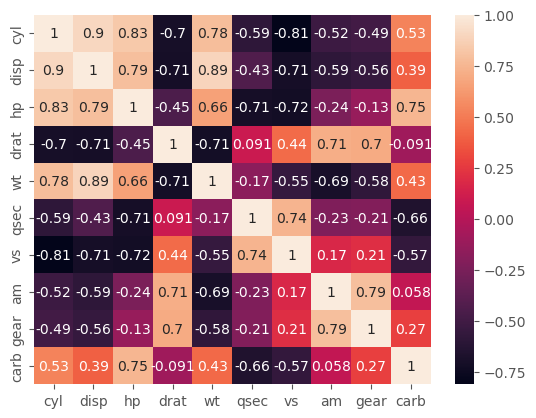

In [316]:
corr = X_features.corr()
print(corr)
sns.heatmap(corr,annot = True)

In [317]:
# vif calculator for festure.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [318]:
calc_vif(X)

,Variables,VIF
0,const,1596.273030
1,cyl,15.373833
2,disp,21.620241
3,hp,9.832037
4,drat,3.374620
5,wt,15.164887
6,qsec,7.527958
7,vs,4.965873
8,am,4.648487
9,gear,5.357452


In [319]:
#CHOOSING <10 VI VALUES FEATURE
X_new = X.drop(['cyl', 'disp',], axis = 1)
X_new

,const,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,110,3.90,2.620,16.46,0,1,4,4
1,1.0,110,3.90,2.875,17.02,0,1,4,4
2,1.0,93,3.85,2.320,18.61,1,1,4,1
3,1.0,110,3.08,3.215,19.44,1,0,3,1
4,1.0,175,3.15,3.440,17.02,0,0,3,2
5,1.0,105,2.76,3.460,20.22,1,0,3,1
6,1.0,245,3.21,3.570,15.84,0,0,3,4
7,1.0,62,3.69,3.190,20.00,1,0,4,2
8,1.0,95,3.92,3.150,22.90,1,0,4,2
9,1.0,123,3.92,3.440,18.30,1,0,4,4


In [320]:
X_new = X.drop(['cyl', 'disp','hp'], axis = 1)
X_new.shape

(32, 8)

In [321]:
calc_vif(X_new)

,Variables,VIF
0,const,555.181078
1,drat,3.043073
2,wt,5.104823
3,qsec,4.139107
4,vs,4.191818
5,am,4.258479
6,gear,4.688164
7,carb,3.826243


In [322]:
# # Fit the regression model
mlr_model_2 = sm.OLS(y, X_new).fit()
print('MLR_model:',mlr_model.rsquared)
print('MLR_model:',mlr_model.rsquared_adj)
print('MLR_MODEL_2:',mlr_model_2.rsquared)
print('MLR_MODEL_2:',mlr_model_2.rsquared_adj)

MLR_model: 0.8455176781749856
MLR_model: 0.7351731625856897
MLR_MODEL_2: 0.8622515069014454
MLR_MODEL_2: 0.8220748630810336


In [328]:
mlr_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.822   
Dependent Variable: mpg              AIC:                157.3211
Date:               2024-08-04 11:31 BIC:                169.0470
No. Observations:   32               Log-Likelihood:     -70.661 
Df Model:           7                F-statistic:        21.46   
Df Residuals:       24               Prob (F-statistic): 6.99e-09
R-squared:          0.862            Scale:              6.4630  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const     8.4612    10.5891    0.7990   0.4321   -13.3936   30.3160
drat      1.0565     1.4897    0.7092   0.4850    -2.0181    4.1311
wt       -2.9502     1.0543   -2.7981   0.0100    -5.1262   -0.7741
qsec      0.8955     0.5198    1.7226   0.0978    -0.1774    1.9684
vs       -0.1033     1.8548   -0.0557   0.9561    -3.9314    3.7248
am        2.5377     1.8883    1.3439   0.1916    -1.3596    6.4349
gear      0.6730     1.3400    0.5023   0.6201    -2.0925    3.4386
carb     -0.7573     0.5530   -1.3696   0.1835    -1.8986    0.3839
-----------------------------------------------------------------
Omnibus:              0.676        Durbin-Watson:           1.989
Prob(Omnibus):        0.713        Jarque-Bera (JB):        0.766
Skew:                 0.252        Prob(JB):                0.682
Kurtosis:             2.434        Condition No.:           455  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [329]:
#RESIDUAL ANALYSIS
mlr_model_2.resid

0    -0.792474
1    -0.541662
2    -3.918730
3     0.602575
4     1.313567
5    -2.335050
6    -0.194947
7     2.467188
8    -2.090773
9     0.798752
10   -1.138550
11    1.373731
12    1.091573
13   -1.219120
14   -0.759222
15   -0.176566
16    4.005579
17    4.314123
18    1.298314
19    4.204335
20   -2.675514
21   -1.104062
22   -2.451925
23   -0.562710
24    3.055476
25   -1.057235
26   -0.171095
27    3.000621
28   -3.625790
29    0.347190
30    0.412457
31   -3.470056
dtype: float64

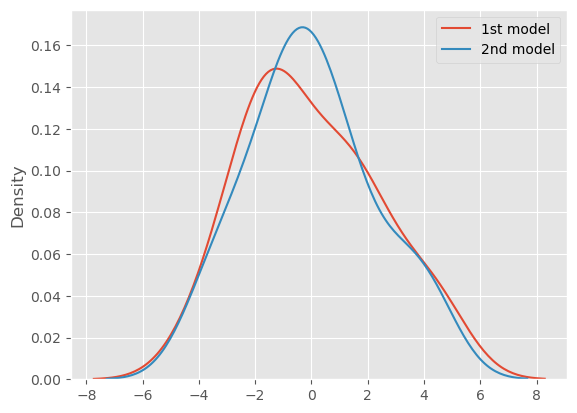

In [330]:
# EXTRACTING RESIDUAL VALUE FOR BOTH MODELS.
Residual1 = mlr_model.resid
Residual2 = mlr_model_2.resid
#KDE PLOTS
sns.kdeplot(Residual1,label = '1st model')
sns.kdeplot(Residual2,label = '2nd model')
plt.legend()
plt.show()

            

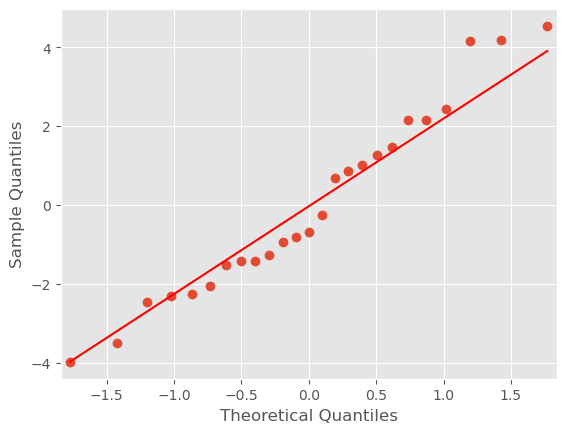

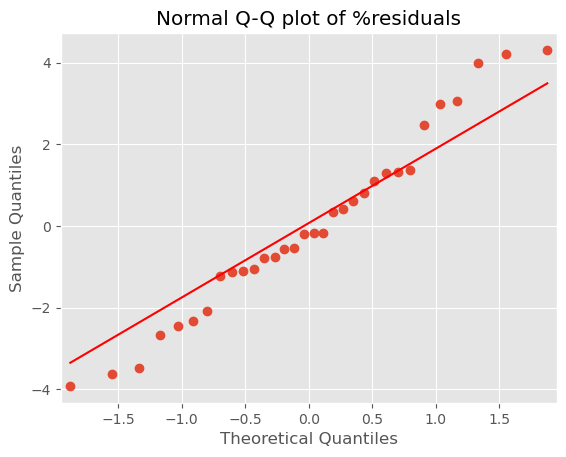

In [331]:
# QQ plot
qqplot=sm.qqplot(Residual1,line='q')
qqplot=sm.qqplot(Residual2,line='q')
plt.title("Normal Q-Q plot of %residuals")
plt.show()

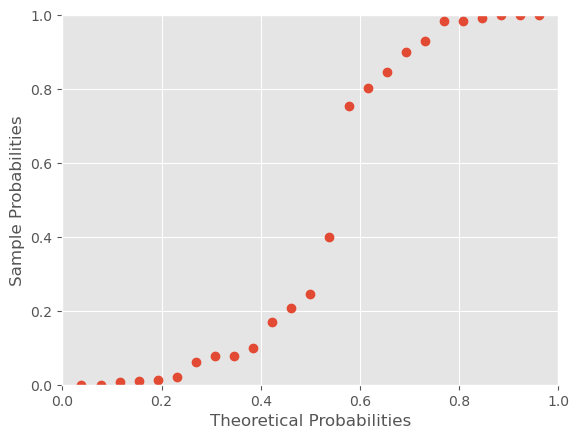

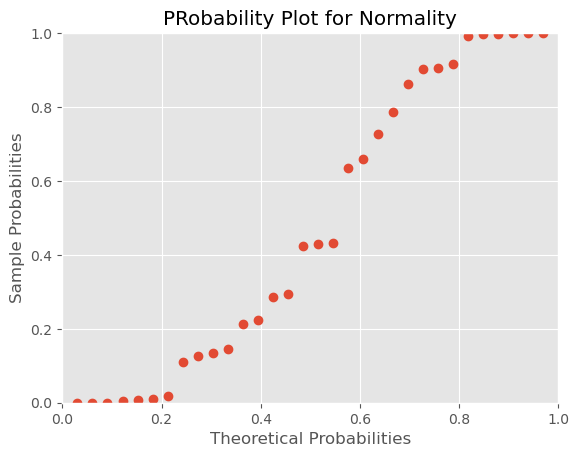

In [332]:
pplot = sm.ProbPlot(Residual1)
pplot1 = sm.ProbPlot(Residual2)
fig = pplot.ppplot()
fig = pplot1.ppplot()
plt.title("PRobability Plot for Normality")
plt.show()

In [333]:
#Residual plot

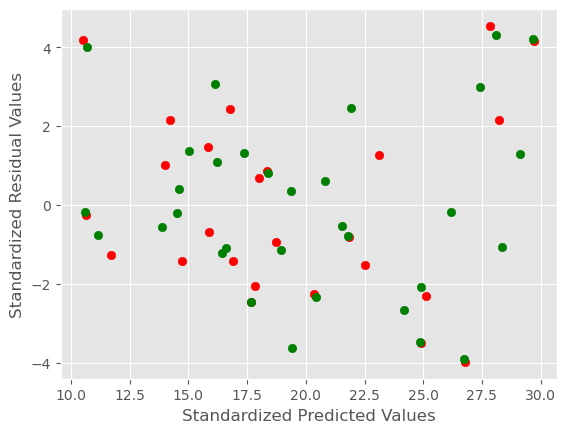

In [334]:
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, c='r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid, c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

In [335]:
X_new

,const,drat,wt,qsec,vs,am,gear,carb
0,1.0,3.90,2.620,16.46,0,1,4,4
1,1.0,3.90,2.875,17.02,0,1,4,4
2,1.0,3.85,2.320,18.61,1,1,4,1
3,1.0,3.08,3.215,19.44,1,0,3,1
4,1.0,3.15,3.440,17.02,0,0,3,2
5,1.0,2.76,3.460,20.22,1,0,3,1
6,1.0,3.21,3.570,15.84,0,0,3,4
7,1.0,3.69,3.190,20.00,1,0,4,2
8,1.0,3.92,3.150,22.90,1,0,4,2
9,1.0,3.92,3.440,18.30,1,0,4,4


In [336]:
# DATA TRANSFORMATION

In [337]:
# Transformation of data via standerdization method
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()

In [338]:
X_standr = standardized_values(X_new)
print(X_standr)

    const      drat        wt      qsec        vs        am      gear  \
0     NaN  0.567514 -0.610400 -0.777165 -0.868028  1.189901  0.423554   
1     NaN  0.567514 -0.349785 -0.463781 -0.868028  1.189901  0.423554   
2     NaN  0.474000 -0.917005  0.426007  1.116036  1.189901  0.423554   
3     NaN -0.966118 -0.002300  0.890487  1.116036 -0.814143 -0.931819   
4     NaN -0.835198  0.227654 -0.463781 -0.868028 -0.814143 -0.931819   
5     NaN -1.564608  0.248095  1.326987  1.116036 -0.814143 -0.931819   
6     NaN -0.722981  0.360516 -1.124126 -0.868028 -0.814143 -0.931819   
7     NaN  0.174754 -0.027850  1.203871  1.116036 -0.814143  0.423554   
8     NaN  0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554   
9     NaN  0.604919  0.227654  0.252526  1.116036 -0.814143  0.423554   
10    NaN  0.604919  0.227654  0.588295  1.116036 -0.814143  0.423554   
11    NaN -0.984820  0.871525 -0.251127 -0.868028 -0.814143 -0.931819   
12    NaN -0.984820  0.524039 -0.139204 -0.868028 -

In [339]:
X_standr.describe()

,const,drat,wt,qsec,vs,am,gear,carb
count,0.0,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,NaN,-2.775558e-16,-3.608225e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,NaN,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,NaN,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,NaN,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,NaN,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


In [340]:
X_standr = X_standr.drop(['const'],axis = 1)

In [341]:
X_standr = sm.add_constant(X_standr)
print(X_standr)
y_stdndr = standardized_values(y)
y_stdndr

    const      drat        wt      qsec        vs        am      gear  \
0     1.0  0.567514 -0.610400 -0.777165 -0.868028  1.189901  0.423554   
1     1.0  0.567514 -0.349785 -0.463781 -0.868028  1.189901  0.423554   
2     1.0  0.474000 -0.917005  0.426007  1.116036  1.189901  0.423554   
3     1.0 -0.966118 -0.002300  0.890487  1.116036 -0.814143 -0.931819   
4     1.0 -0.835198  0.227654 -0.463781 -0.868028 -0.814143 -0.931819   
5     1.0 -1.564608  0.248095  1.326987  1.116036 -0.814143 -0.931819   
6     1.0 -0.722981  0.360516 -1.124126 -0.868028 -0.814143 -0.931819   
7     1.0  0.174754 -0.027850  1.203871  1.116036 -0.814143  0.423554   
8     1.0  0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554   
9     1.0  0.604919  0.227654  0.252526  1.116036 -0.814143  0.423554   
10    1.0  0.604919  0.227654  0.588295  1.116036 -0.814143  0.423554   
11    1.0 -0.984820  0.871525 -0.251127 -0.868028 -0.814143 -0.931819   
12    1.0 -0.984820  0.524039 -0.139204 -0.868028 -

0     0.150885
1     0.150885
2     0.449543
3     0.217253
4    -0.230735
5    -0.330287
6    -0.960789
7     0.715018
8     0.449543
9    -0.147774
10   -0.380064
11   -0.612354
12   -0.463025
13   -0.811460
14   -1.607883
15   -1.607883
16   -0.894420
17    2.042389
18    1.710547
19    2.291272
20    0.233846
21   -0.761683
22   -0.811460
23   -1.126710
24   -0.147774
25    1.196190
26    0.980492
27    1.710547
28   -0.711907
29   -0.064813
30   -0.844644
31    0.217253
Name: mpg, dtype: float64

In [342]:
X_standr

,const,drat,wt,qsec,vs,am,gear,carb
0,1.0,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203
1,1.0,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203
2,1.0,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152
3,1.0,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152
4,1.0,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034
5,1.0,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152
6,1.0,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203
7,1.0,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034
8,1.0,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034
9,1.0,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203


In [343]:
## Fit the regression  model
mlr_model_3 = sm.OLS(y_stdndr, X_standr).fit()
print('MLR_model_3:',mlr_model_3.rsquared)
print('MLR_model_3:',mlr_model_3.rsquared_adj)
print('MLR_model_2:',mlr_model_2.rsquared)

MLR_model_3: 0.8622515069014453
MLR_model_3: 0.8220748630810335
MLR_model_2: 0.8622515069014454


In [344]:
min(mlr_model_3.resid),max(mlr_model_3.resid)

(-0.6502014563349195, 0.7158055695391115)

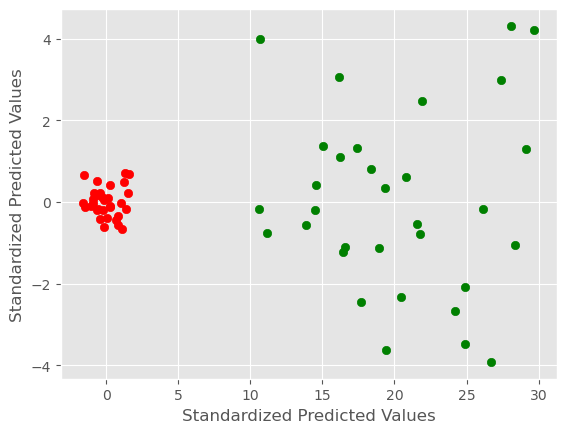

In [345]:
plt.scatter(mlr_model_3.fittedvalues, mlr_model_3.resid,c='r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid,c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Predicted Values")
plt.show()


In [346]:
# Outliers analysis

In [347]:
sm_model = sm.regression.linear_model.OLS(y_stdndr, X_standr).fit()
influence = sm_model.get_influence()
print(influence.cooks_distance)

(array([3.72455686e-03, 1.92860268e-03, 8.66321842e-02, 1.84819089e-03,
       5.91875282e-03, 5.34428584e-02, 2.32436551e-04, 3.92574705e-02,
       3.13064898e-01, 7.40125781e-03, 1.22898223e-02, 3.32102466e-03,
       3.07037773e-03, 4.64335877e-03, 4.34356461e-03, 3.16816252e-04,
       1.65015623e-01, 7.74138158e-02, 3.26021250e-02, 8.79064382e-02,
       4.49099487e-02, 6.63485194e-03, 1.98434289e-02, 4.46768207e-03,
       2.95888998e-02, 4.08254578e-03, 1.13323447e-03, 1.86684944e-01,
       2.98474877e-01, 1.59075104e-03, 6.50250423e-03, 7.99975113e-02]), array([1.        , 1.        , 0.99933938, 1.        , 0.99999998,
       0.99989026, 1.        , 0.9999661 , 0.95341705, 0.99999995,
       0.99999964, 1.        , 1.        , 0.99999999, 0.99999999,
       1.        , 0.99365935, 0.99956251, 0.99998342, 0.99930329,
       0.99994329, 0.99999997, 0.9999976 , 0.99999999, 0.99998861,
       1.        , 1.        , 0.99046356, 0.95936686, 1.        ,
       0.99999997, 0.999506

In [348]:
influence_list = influence.cooks_distance[0]
print(len(influence_list))

32


In [349]:
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = X_standr.index
cooks_df = X_standr.merge(influence_df, left_index=True, right_index=True)
cooks_df

,const,drat,wt,qsec,vs,am,gear,carb,influence
0,1.0,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203,0.003725
1,1.0,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203,0.001929
2,1.0,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152,0.086632
3,1.0,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152,0.001848
4,1.0,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034,0.005919
5,1.0,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152,0.053443
6,1.0,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203,0.000232
7,1.0,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034,0.039257
8,1.0,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034,0.313065
9,1.0,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203,0.007401


In [350]:
# Setting the threshold and  getting the outliers
original_length = len(X_standr)
cooks_threshold = 4 / original_length
print(cooks_threshold)

0.125


In [351]:
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
cooks_outliers.sort_values(by=["influence"])

print(cooks_outliers)
print("Removed:", len(cooks_outliers))
print(f"this is {cooks_threshold* 100}% of our dataset")

    const      drat        wt      qsec        vs        am      gear  \
8     1.0  0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554   
16    1.0 -0.685575  2.174596 -0.239935 -0.868028 -0.814143 -0.931819   
27    1.0  0.324377 -1.741772 -0.530935  1.116036  1.189901  1.778928   
28    1.0  1.166004 -0.048290 -1.874010 -0.868028  1.189901  1.778928   

        carb  influence  
8  -0.503034   0.313065  
16  0.735203   0.165016  
27 -0.503034   0.186685  
28  0.735203   0.298475  
Removed: 4
this is 12.5% of our dataset


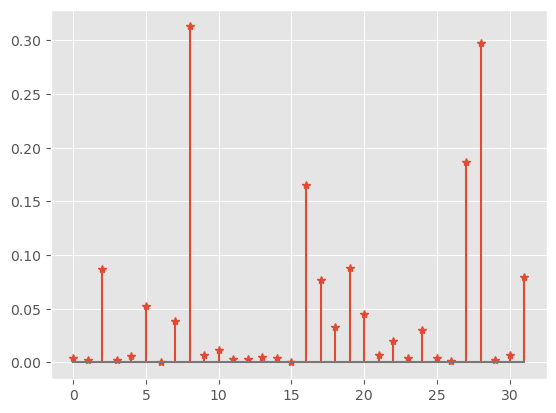

In [352]:
plt.stem(np.arange(len(X_standr)), np.round(influence_list, 3), markerfmt='*')
plt.show()

In [353]:
X_standr.shape

(32, 8)

In [354]:
leverage = 3*((8+1)/32)
print(leverage)

0.84375


In [355]:
# leverage value / influvencing points

In [356]:
K = X_standr.shape[1]
n = X_standr.shape[0]
leverage_cutoff = 3*((K+1)/n)

print(" Number of variables:", K, " and number of observations:", n)
print("Cutoff for leverage value: ", round(leverage_cutoff, 3))

 Number of variables: 8  and number of observations: 32
Cutoff for leverage value:  0.844


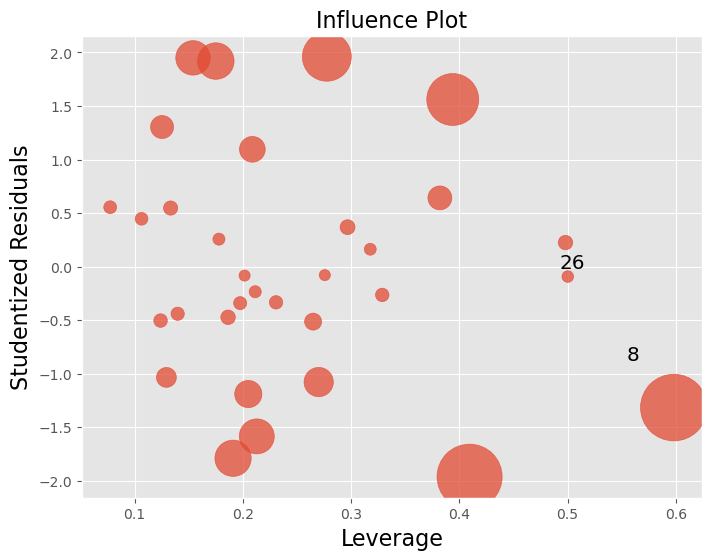

In [357]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (8,6))
influence_plot(mlr_model_3, ax = ax)
plt.show()

In [358]:
X_standr_out = X_standr.drop(X_standr.index[[16,8,26,27]],axis=0).reset_index()

In [359]:
X_standr_out = X_standr_out.drop(['index'],axis=1)
print(len(X_standr_out))

28


In [360]:
len(X_standr_out)

28

In [361]:
y_stdndr_out = y_stdndr.drop(y_stdndr.index[[8,16,26,27]],axis=0).reset_index()
y_stdndr_out = y_stdndr_out.drop(['index'],axis=1)
len(y_stdndr_out)

28

In [362]:
X_standr_out.shape, y_stdndr_out.shape

((28, 8), (28, 1))

In [363]:
# X_standr_out = sm.add_constant(XX_standr_out)
mlr_model_4 = sm.OLS(y_stdndr_out, X_standr_out).fit()
print(mlr_model_4.rsquared)
print(mlr_model_4.rsquared_adj)

0.8870420217273226
0.8475067293318855


In [364]:
mlr_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.848   
Dependent Variable: mpg              AIC:                32.2498 
Date:               2024-08-04 11:31 BIC:                42.9074 
No. Observations:   28               Log-Likelihood:     -8.1249 
Df Model:           7                F-statistic:        22.44   
Df Residuals:       20               Prob (F-statistic): 3.66e-08
R-squared:          0.887            Scale:              0.14645 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.0020     0.0767   -0.0254   0.9800   -0.1620    0.1581
drat       0.1818     0.1418    1.2826   0.2143   -0.1139    0.4776
wt        -0.6277     0.1767   -3.5530   0.0020   -0.9962   -0.2592
qsec       0.6340     0.2164    2.9297   0.0083    0.1826    1.0854
vs        -0.3227     0.2134   -1.5122   0.1461   -0.7679    0.1224
am         0.0773     0.1680    0.4601   0.6504   -0.2731    0.4277
gear       0.1700     0.2111    0.8055   0.4300   -0.2703    0.6104
carb      -0.1148     0.1607   -0.7139   0.4836   -0.4501    0.2206
-----------------------------------------------------------------
Omnibus:              0.530        Durbin-Watson:           2.082
Prob(Omnibus):        0.767        Jarque-Bera (JB):        0.634
Skew:                 0.261        Prob(JB):                0.728
Kurtosis:             2.480        Condition No.:           8    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [365]:
# DATA TRANSFORMATION FOR TESTING DATA

In [366]:
test_X = test_X.drop(['cyl','disp','hp'],axis = 1)

In [367]:
test_X.shape

(7, 8)

In [368]:
test_X = standardized_values(test_X)
test_X = test_X.drop(['const'],axis = 1)

In [369]:
test_X = sm.add_constant(test_X)
test_X

,const,drat,wt,qsec,vs,am,gear,carb
6,1.0,-0.987839,1.481688,-1.108091,-1.069045,-1.069045,-0.952661,0.826033
26,1.0,0.854114,-0.555633,-0.632631,-1.069045,0.801784,1.270215,-0.225282
25,1.0,0.325685,-0.847696,0.583663,0.801784,0.801784,0.158777,-0.750939
3,1.0,-1.184112,0.975919,0.882208,0.801784,-1.069045,-0.952661,-0.750939
18,1.0,1.609012,-1.303600,0.373576,0.801784,0.801784,0.158777,-0.225282
29,1.0,-0.368822,0.341928,-1.296064,-1.069045,0.801784,1.270215,1.877348
20,1.0,-0.248038,-0.092605,1.197339,0.801784,-1.069045,-0.952661,-0.750939


In [370]:
 test_y = standardized_values(test_y)
test_y.shape

(7,)

In [371]:
# PREDICTION ON TESTING DATA

In [372]:
y_pred = mlr_model_4.predict(test_X)
y_pred

6    -1.808574
26    0.749843
25    0.875804
3    -0.687724
18    1.201829
29   -0.697843
20    0.353006
dtype: float64

In [373]:
# ACTUAL VALUR AND THE PREDICTED VALUE'

In [374]:
reg_model_diff = pd.DataFrame({'Actual value': test_y, 'Predicted value': y_pred,
                               'Diffrence': test_y-y_pred})
reg_model_diff

,Actual value,Predicted value,Diffrence
6,-1.606707,-1.808574,0.201867
26,0.568323,0.749843,-0.181521
25,0.809993,0.875804,-0.065812
3,-0.286817,-0.687724,0.400906
18,1.386283,1.201829,0.184454
29,-0.602847,-0.697843,0.094996
20,-0.268227,0.353006,-0.621233


In [375]:
sum(reg_model_diff['Diffrence']**2)

0.6677349711574474

In [376]:
#EVALUATION METRICS ******

MAE (MEAN ABSOLUTE ERROR
MSE (MEAN SQUARED ERROR
RMSE(ROOT MEAN SQUARED ERROR),
R2 (R-SQUARED)

In [378]:
mse = (test_y-y_pred)**2
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

mae = np.abs(test_y-y_pred)
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse = np.sqrt(mse.mean())
print(f"RMSE:{rmse:0.2f}")

# R^2 coefficient of determination
SE_line = sum((test_y-y_pred)**2)
SE_mean = sum((test_y-test_y.mean())**2)
r2 = 1-(SE_line/SE_mean)
print(f"R^2 coefficient of determination: {r2:0.2f}%")

MSE: 0.10 (+/- 0.14)
MAE: 0.25 (+/- 0.20)
RMSE:0.31
R^2 coefficient of determination: 0.89%


In [379]:
# model fitting using scikit -learn library

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

LR_model = LinearRegression()
LR_model.fit(X = X_standr_out, y=y_stdndr_out)
print(f'R2_score for training: {LR_model.score(X = X_standr_out, y=y_stdndr_out)}')

mse = mean_squared_error(test_y, y_pred)
print(f'MSE: {mse}')

RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'RMSE: {RMSE}')

R2_score for training: 0.8870420217273226
MSE: 0.09539071016534963
RMSE: 0.3088538653883898
